# XLM-R with pseudo labels and knowledge distillation

This is regular XLM-R trained on 1/6th of the full translated training data as well as on the test data, with pseudo labels blended with the original labels (on the training data). LAMB optimizer and 1 cycle schedule policy.

The hyper-parameters come from a somewhat extensive search using GCP (Many thanks for google TFRC team and their support!)

Code repo: https://github.com/henrique/jigsaw20

In [1]:
!git clone https://github.com/henrique/jigsaw20.git

import sys
sys.path.append('/kaggle/working/jigsaw20')

Cloning into 'jigsaw20'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 156 (delta 92), reused 106 (delta 45), pack-reused 0
Receiving objects: 100% (156/156), 2.34 MiB | 20.17 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [2]:
import numpy as np
import pandas as pd
from train import train

params = dict(
    pooling='first',
    optimizer='LAMB',
    batch_size=27,
    lr=0.000277952,
    mom_min=0.806579,
    mom_max=0.922184,
    div_factor=55.477,
    final_div_factor=1123.49,
    weight_decay=7.72285e-06,
    dropout=0.4,
    loss_fn='bce',
    label_smoothing=0.0483175,
    warm_up=1.2361,
    epochs=41,
    steps_per_epoch=250,
    dataset='../input/jigsaw20-ds-tt6-36/jigsaw20_ds1789117tt6_fold5.npz',
    path=f'jigsaw',
    tpu_id=None, gcs=None,
    seed=1083,
)

# auc = train(**params)

In [3]:
# clean up repo
!rm -r jigsaw20

# Load pre-trained weights and stats

In [4]:
!cp /kaggle/input/jigsaw-tt6f5-20200614-091231-val0-965669/* .
!ls -shS

cp: -r not specified; omitting directory '/kaggle/input/jigsaw-tt6f5-20200614-091231-val0-965669/__results___files'
total 2.1G
2.1G xlm-r_jigsaw-tt6f5-20200614_091231_t2e_0.9656692005620204.h5
3.2M valid_oof.csv
1.1M submission.csv
280K __results__.html
 32K history.png
 32K __notebook__.ipynb
8.0K valid_hist.png
8.0K valid_toxic_hist.png
8.0K sub_hist.png
4.0K history.csv
4.0K __output__.json
4.0K params0.965669.csv
   0 custom.css


,loss,auc,val_loss,val_auc
0,0.589047,0.000000,0.351965,0.907835
1,0.401507,0.550056,0.294248,0.937984
2,0.376471,0.000000,0.287751,0.950814
3,0.372510,0.000000,0.270937,0.949785
4,0.370903,0.000000,0.274741,0.951757
5,0.369499,0.955647,0.268028,0.954292
6,0.368431,0.000000,0.284725,0.954071
7,0.365307,0.000000,0.274151,0.955432
8,0.364404,0.000000,0.276682,0.955301
9,0.364644,0.000000,0.271704,0.954452


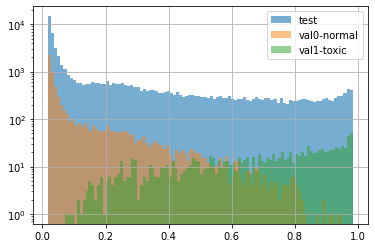

In [5]:
from matplotlib import pyplot as plt
_ = pd.read_csv('submission.csv').toxic.hist(bins=100, log=True, alpha=0.6)
_ = pd.read_csv('valid_oof.csv').groupby('toxic').pred.hist(bins=100, log=True, alpha=0.5)
plt.legend(['test', 'val0-normal', 'val1-toxic'])

pd.read_csv('history.csv')

In [6]:
pd.read_csv('params0.965669.csv').T

,0
pretrained,NaN
dual,False
tpu_id,t2e
freeze_embed,False
batch_size,27
max_len,192
seed,1083
path,jigsaw/tt6f5
gcs,hm-eu
dataset,../input/jigsaw20-ds-tt6-36/jigsaw20_ds1789117...


# Apply language multipliers

as in https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification/discussion/160980

Thanks @christofhenkel this improves our public LB from [0.9475](https://www.kaggle.com/hmendonca/jigsaw20-xlm-r-lb0-9487-singel-model?scriptVersionId=37240126) to [0.9487](https://www.kaggle.com/hmendonca/jigsaw20-xlm-r-lb0-9487-singel-model?scriptVersionId=37241954) !!

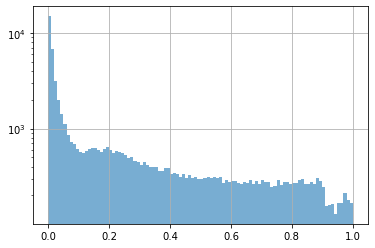

In [7]:
sub = pd.read_csv('submission.csv')
test = pd.read_csv('../input/jigsaw-multilingual-toxic-comment-classification/test.csv')

sub.loc[test["lang"] == "es", "toxic"] *= 1.06
sub.loc[test["lang"] == "fr", "toxic"] *= 1.04
sub.loc[test["lang"] == "it", "toxic"] *= 0.97
sub.loc[test["lang"] == "pt", "toxic"] *= 0.96
sub.loc[test["lang"] == "tr", "toxic"] *= 0.98
# min-max norm
sub.toxic -= sub.toxic.min()
sub.toxic /= sub.toxic.max()
sub.toxic.hist(bins=100, log=True, alpha=0.6)

sub.to_csv('submission0.csv', index=False)

# Ensemble with best submission

https://www.kaggle.com/xiwuhan/jmtc-2nd-place-solution

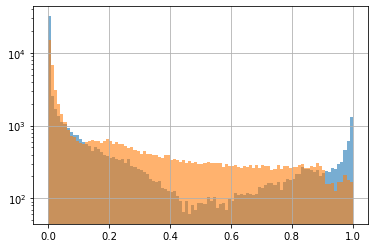

In [8]:
ensemble = pd.read_csv('../input/jigsaw20xiwuhanjmtc2ndplacesolution/submission.csv')

# min-max norm
ensemble.toxic -= ensemble.toxic.min()
ensemble.toxic /= ensemble.toxic.max()

ensemble.toxic.hist(bins=100, log=True, alpha=0.6)
sub.toxic.hist(bins=100, log=True, alpha=0.6)

ensemble.toxic = ensemble.toxic * 0.8 + sub.toxic * 0.2
ensemble.to_csv('submission.csv', index=False)